<a href="https://colab.research.google.com/github/David27324/Googlecolab/blob/main/Datoscovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

ruta_csv = '/content/drive/MyDrive/Datoscovid.csv'
datos = pd.read_csv(ruta_csv)
num_registros = len(datos)
print("La cantidad de registros en el archivo es:", num_registros)

primeros_datos = datos.head(118)
print(primeros_datos)

Mounted at /content/drive
La cantidad de registros en el archivo es: 1299030
    provincia_iso sexo grupo_edad       fecha  num_casos  num_hosp  num_uci  \
0               A    H        0-9  2020-01-01          0         0        0   
1               A    H      10-19  2020-01-01          0         0        0   
2               A    H      20-29  2020-01-01          0         0        0   
3               A    H      30-39  2020-01-01          0         0        0   
4               A    H      40-49  2020-01-01          0         0        0   
..            ...  ...        ...         ...        ...       ...      ...   
113            AV   NC      30-39  2020-01-01          0         0        0   
114            AV   NC      40-49  2020-01-01          0         0        0   
115            AV   NC      50-59  2020-01-01          0         0        0   
116            AV   NC      60-69  2020-01-01          0         0        0   
117            AV   NC      70-79  2020-01-01         

Aquí podremos observar unas estadísticas generales de la tabla en cuestión la cuál será analizada en diferentes fragmentos mediante códigos de filtrado debido a su gran tamaño y al enorme número de datos que esta contiene en los siguientes 2 gráficos:

<ipython-input-2-d5d25e1035c9>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_agrupados = datos_filtrados.groupby('year_month').sum()


La cantidad de registros actuales es: 12
            num_casos  num_hosp  num_uci  num_def
year_month                                       
2020-01             0         0        0        0
2020-02             0         1        0        0
2020-03            39        39        0        9
2020-04            55        25        0       23
2020-05             6         2        0        2
2020-06             2         2        1        2
2020-07             0         0        0        0
2020-08             8         0        0        0
2020-09            26        17        0        4
2020-10           108        51        0       21
2020-11           126        46        1       29
2020-12            75        48        0       30


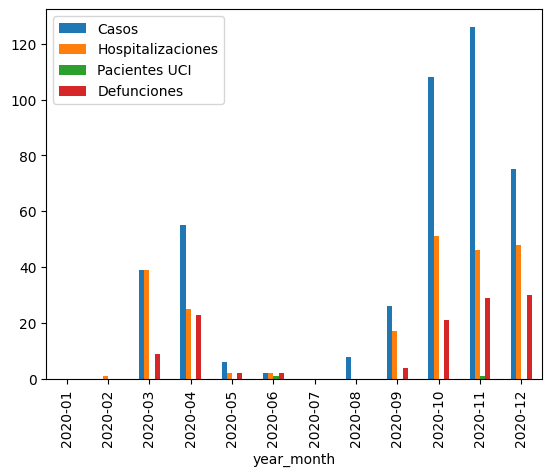

In [ ]:
datos_filtrados=datos.loc[datos['grupo_edad'] == '80+']
datos_filtrados=datos_filtrados.loc[datos_filtrados['provincia_iso']=='P']
datos_filtrados=datos_filtrados.loc[datos_filtrados['sexo']=='H'] 
datos_filtrados = datos_filtrados.loc[datos_filtrados['fecha'] < '2021-01-01']

#Convertir la columna fecha en un dato de tipo fecha para que el sistema lo pueda detectar
datos_filtrados['fecha'] = pd.to_datetime(datos_filtrados['fecha'])
#Agrupamos datos por mes
datos_filtrados['year_month'] = datos_filtrados['fecha'].dt.to_period('M')
datos_agrupados = datos_filtrados.groupby('year_month').sum()

print("La cantidad de registros actuales es:", len(datos_agrupados))

print(datos_agrupados)

df2 = pd.DataFrame(datos_agrupados, columns=['num_casos', 'num_hosp', 'num_uci', 'num_def'])
df2.rename(columns={'num_casos': 'Casos', 'num_hosp': 'Hospitalizaciones', 'num_uci': 'Pacientes UCI', 'num_def': 'Defunciones'}, inplace=True)
df2.plot.bar();

En esta primera gráfica podemos observar una estadística que nos muestra el número de personas mayores de 80 años afectadas por el covid, hospitalizadas, ingresados en UCI y fallecimientos ocurridos en la provincia de Palencia en el año 2020.



,Casos
80+,9617
70-79,9392
60-69,13202
50-59,22680
40-49,29182
30-39,21802
20-29,19873
10-19,20051
00-09,14079
NC,1


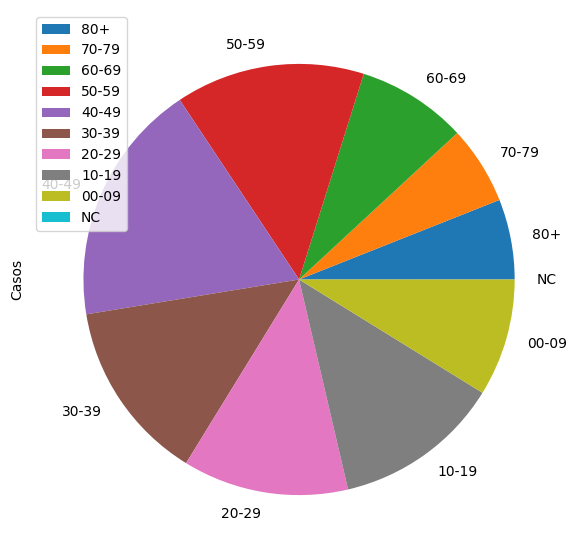

In [ ]:
#En primer lugar se aplican una serie de filtrados de información para reducir las miles de columnas de información con las que cuenta la tabla a analizar
#Entre los filtrados esta por ejemplo el de provincias, seleccionando únicamente Valladolid
datos_filtrados_2_80=datos.loc[datos['grupo_edad'] == '80+']
datos_filtrados_2_80=datos_filtrados_2_80.loc[datos_filtrados_2_80['provincia_iso']=='VA'] 
suma_casos_80=datos_filtrados_2_80['num_casos'].sum()

datos_filtrados_2_70 = datos.loc[datos['grupo_edad'] == '70-79']
datos_filtrados_2_70 = datos_filtrados_2_70.loc[datos_filtrados_2_70['provincia_iso']=='VA']
suma_casos_70 = datos_filtrados_2_70['num_casos'].sum()

datos_filtrados_2_60=datos.loc[datos['grupo_edad'] == '60-69']
datos_filtrados_2_60=datos_filtrados_2_60.loc[datos['provincia_iso']=='VA'] 
suma_casos_60=datos_filtrados_2_60['num_casos'].sum()

datos_filtrados_2_50=datos.loc[datos['grupo_edad'] == '50-59']
datos_filtrados_2_50=datos_filtrados_2_50.loc[datos['provincia_iso']=='VA'] 
suma_casos_50=datos_filtrados_2_50['num_casos'].sum()

datos_filtrados_2_40=datos.loc[datos['grupo_edad'] == '40-49']
datos_filtrados_2_40=datos_filtrados_2_40.loc[datos['provincia_iso']=='VA'] 
suma_casos_40=datos_filtrados_2_40['num_casos'].sum()

datos_filtrados_2_30=datos.loc[datos['grupo_edad'] == '30-39']
datos_filtrados_2_30=datos_filtrados_2_30.loc[datos['provincia_iso']=='VA'] 
suma_casos_30=datos_filtrados_2_30['num_casos'].sum()

datos_filtrados_2_20=datos.loc[datos['grupo_edad'] == '20-29']
datos_filtrados_2_20=datos_filtrados_2_20.loc[datos['provincia_iso']=='VA'] 
suma_casos_20=datos_filtrados_2_20['num_casos'].sum()

datos_filtrados_2_10=datos.loc[datos['grupo_edad'] == '10-19']
datos_filtrados_2_10=datos_filtrados_2_10.loc[datos['provincia_iso']=='VA'] 
suma_casos_10=datos_filtrados_2_10['num_casos'].sum()

datos_filtrados_2_00=datos.loc[datos['grupo_edad'] == '0-9']
datos_filtrados_2_00=datos_filtrados_2_00.loc[datos['provincia_iso']=='VA'] 
suma_casos_00=datos_filtrados_2_00['num_casos'].sum()

datos_filtrados_2_NC=datos.loc[datos['grupo_edad'] == 'NC']
datos_filtrados_2_NC=datos_filtrados_2_NC.loc[datos['provincia_iso']=='VA'] 
suma_casos_NC=datos_filtrados_2_NC['num_casos'].sum()



df = pd.DataFrame({'Casos': [suma_casos_80, suma_casos_70, suma_casos_60, suma_casos_50, suma_casos_40, suma_casos_30, suma_casos_20, suma_casos_10, suma_casos_00, suma_casos_NC]}, index=['80+', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '00-09', 'NC'])
display(df)

plot = df.plot.pie(y='Casos', figsize=(7, 7))



Este gráfico en forma de galleta nos muestra el número de casos covid entre la población en diferentes tramos de edad en la provincia de Valladolid.

,Hospitalizaciones
80+,2702
70-79,911
60-69,752
50-59,554
40-49,322
30-39,185
20-29,95
10-19,30
00-09,27
NC,1


<Axes: >

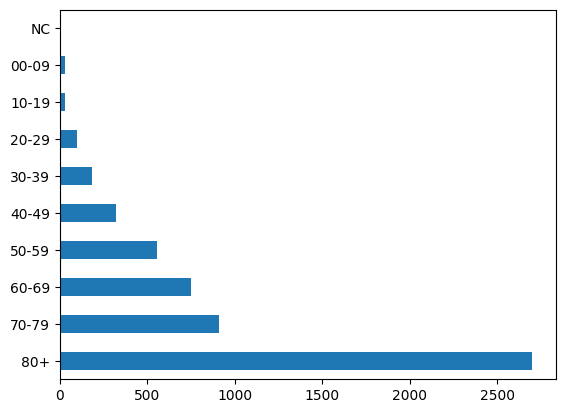

In [ ]:
datos_filtrados_3_80=datos.loc[datos['grupo_edad'] == '80+']
datos_filtrados_3_80=datos_filtrados_3_80.loc[datos_filtrados_3_80['provincia_iso']=='VA'] 
suma_casos_80=datos_filtrados_3_80['num_hosp'].sum()

datos_filtrados_3_70 = datos.loc[datos['grupo_edad'] == '70-79']
datos_filtrados_3_70 = datos_filtrados_3_70.loc[datos_filtrados_3_70['provincia_iso']=='SA']
suma_casos_70 = datos_filtrados_3_70['num_hosp'].sum()

datos_filtrados_3_60=datos.loc[datos['grupo_edad'] == '60-69']
datos_filtrados_3_60=datos_filtrados_3_60.loc[datos['provincia_iso']=='SA'] 
suma_casos_60=datos_filtrados_3_60['num_hosp'].sum()

datos_filtrados_3_50=datos.loc[datos['grupo_edad'] == '50-59']
datos_filtrados_3_50=datos_filtrados_3_50.loc[datos['provincia_iso']=='SA'] 
suma_casos_50=datos_filtrados_3_50['num_hosp'].sum()

datos_filtrados_3_40=datos.loc[datos['grupo_edad'] == '40-49']
datos_filtrados_3_40=datos_filtrados_3_40.loc[datos['provincia_iso']=='SA'] 
suma_casos_40=datos_filtrados_3_40['num_hosp'].sum()

datos_filtrados_3_30=datos.loc[datos['grupo_edad'] == '30-39']
datos_filtrados_3_30=datos_filtrados_3_30.loc[datos['provincia_iso']=='SA'] 
suma_casos_30=datos_filtrados_3_30['num_hosp'].sum()

datos_filtrados_3_20=datos.loc[datos['grupo_edad'] == '20-29']
datos_filtrados_3_20=datos_filtrados_3_20.loc[datos['provincia_iso']=='SA'] 
suma_casos_20=datos_filtrados_3_20['num_hosp'].sum()

datos_filtrados_3_10=datos.loc[datos['grupo_edad'] == '10-19']
datos_filtrados_3_10=datos_filtrados_3_10.loc[datos['provincia_iso']=='SA'] 
suma_casos_10=datos_filtrados_3_10['num_hosp'].sum()

datos_filtrados_3_00=datos.loc[datos['grupo_edad'] == '0-9']
datos_filtrados_3_00=datos_filtrados_3_00.loc[datos['provincia_iso']=='SA'] 
suma_casos_00=datos_filtrados_3_00['num_hosp'].sum()

datos_filtrados_3_NC=datos.loc[datos['grupo_edad'] == 'NC']
datos_filtrados_3_NC=datos_filtrados_3_NC.loc[datos['provincia_iso']=='SA'] 
suma_casos_NC=datos_filtrados_3_NC['num_hosp'].sum()



df = pd.DataFrame({'Hospitalizaciones': [suma_casos_80, suma_casos_70, suma_casos_60, suma_casos_50, suma_casos_40, suma_casos_30, suma_casos_20, suma_casos_10, suma_casos_00, suma_casos_NC]}, index=['80+', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '00-09', 'NC'])
display(df)

df.Hospitalizaciones.plot.barh()

En este siguiente gráfico de barras se observa en número de hospitalizaciones realizadas en la privincia de Salamanca en las diferentes franjas de edad.

<ipython-input-6-de1af714e755>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_agrupados5 = datos_filtrados5.groupby('year_month').sum()


<Axes: >

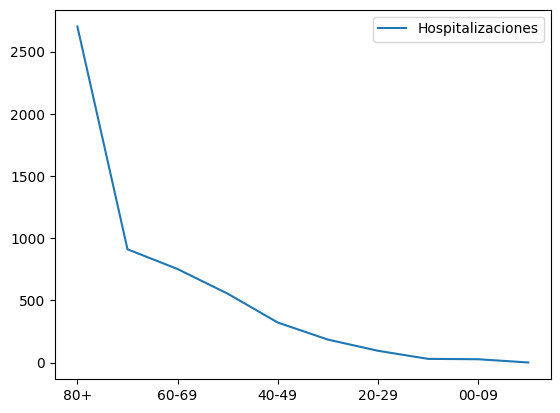

In [ ]:
datos_filtrados5=datos.loc[datos['grupo_edad'] == '80+,70-79,60-69,50-59,40-49,30-39,20-29,10-19,0-9']
datos_filtrados5=datos_filtrados5.loc[datos_filtrados5['provincia_iso']=='P']
datos_filtrados5=datos_filtrados5.loc[datos_filtrados5['sexo']=='M'] 
datos_filtrados5 = datos_filtrados5.loc[datos_filtrados5['fecha'] < '2021-01-01']

#Convertir la columna fecha en un dato de tipo fecha para que el sistema lo pueda detectar
datos_filtrados5['fecha'] = pd.to_datetime(datos_filtrados5['fecha'])
#Agrupamos datos por mes
datos_filtrados5['year_month'] = datos_filtrados5['fecha'].dt.to_period('M')
datos_agrupados5 = datos_filtrados5.groupby('year_month').sum()

#Código para construccion final del estilo de la tabla
df.plot.line()

En esta otra gráfica onservamos también el número de hospitalizaciones pero de una manera distinta.

In [ ]:
datos[(datos['grupo_edad'] >= '0-9') | (datos["sexo"] =='H')]

,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0
...,...,...,...,...,...,...,...,...
1299025,ZA,NC,50-59,2022-03-27,0,0,0,0
1299026,ZA,NC,60-69,2022-03-27,0,0,0,0
1299027,ZA,NC,70-79,2022-03-27,0,0,0,0
1299028,ZA,NC,80+,2022-03-27,0,0,0,0


In [ ]:
df.describe()

,num_casos
count,2.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0
